In [34]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# # Defining groupers
# gr_circuito = ['distrito_id', 'circuito_id']
# gr_eleccion = ['año', 'eleccion_tipo', 'recuento_tipo', 'padron_tipo']
# gr_cargo = ['cargo_id', 'cargo_nombre']



In [35]:
votos_tipo_mesa = pd.read_csv('./../datos/out/votos_tipo_mesa.csv')
votos_sum_eleccion_tipo = votos_tipo_mesa.groupby(['eleccion_id', 'cargo_id', 'votos_tipo']).agg({'votos_cantidad': 'sum'}).unstack('votos_tipo')
votos_tipo_1e6 = (votos_sum_eleccion_tipo/1e6)

In [36]:
electores_circ = pd.read_csv('./../datos/out/n_electores_circ.csv', index_col=[0, 1, 2, 3]).dropna()
electores_circ.columns = ['mesa_electores_sum', 'mesa_electores_size']
electores_circ = electores_circ.reset_index().dropna()
electores_circ[['mesa_electores_sum', 'mesa_electores_size']] = electores_circ[['mesa_electores_sum', 'mesa_electores_size']].astype(float)


In [37]:
elecciones = pd.read_csv('./../datos/BD/eleccion_table.csv')

In [38]:

# Calculating total electors for each election type and year
electores = electores_circ.groupby(['eleccion_id'])[['mesa_electores_size', 'mesa_electores_sum']].sum()
electores['mesa_electores_sum'] = electores['mesa_electores_sum']/1e6
electores.rename(columns = {'mesa_electores_size': 'mesas', 'mesa_electores_sum': 'electores'}, inplace = True)

# Displaying total electors
display(electores.reset_index().merge(elecciones))


,eleccion_id,mesas,electores,año,eleccion_tipo,recuento_tipo,padron_tipo
0,0.0,85307.0,28.700909,2011,GENERAL,PROVISORIO,NORMAL
1,1.0,54031.0,18.178850,2011,PASO,PROVISORIO,NORMAL
2,2.0,92455.0,30.939823,2013,GENERAL,PROVISORIO,NORMAL
3,3.0,91571.0,30.884085,2013,PASO,PROVISORIO,NORMAL
4,4.0,94170.0,31.820939,2015,BALLOTAGE,PROVISORIO,NORMAL
5,5.0,93655.0,31.754774,2015,GENERAL,PROVISORIO,NORMAL
6,6.0,95569.0,32.474342,2015,PASO,PROVISORIO,NORMAL
7,7.0,99681.0,33.761474,2017,GENERAL,PROVISORIO,COMANDO
8,8.0,99681.0,33.761474,2017,GENERAL,PROVISORIO,NORMAL
9,9.0,99687.0,33.786770,2017,PASO,PROVISORIO,COMANDO


In [39]:
# votos_sum_eleccion_tipo = votos_tipo_mesa.groupby(gr_eleccion + gr_cargo + ['votos_tipo']).agg({'votos_cantidad_sum': 'sum'}).unstack('votos_tipo')

# def highlight_cells(val, vmax):
#     alpha = val / vmax
#     color = f'rgba(255, 255, 0, {alpha})' if val >= vmax else ''
#     return 'background-color: {}'.format(color)


# votos_tipo_1e6 = (votos_sum_eleccion_tipo/1e6)
# votos_tipo_1e6.style.applymap(lambda x: highlight_cells(x, votos_sum_eleccion_tipo.max().median())).set_precision(2)

# ## Elecciones principales
# votos_tipo_1e6.loc[votos_tipo_1e6['votos_cantidad_sum']['POSITIVO'] > 19.9]

# elecciones_ppales = votos_tipo_1e6.loc[votos_tipo_1e6['votos_cantidad_sum']['POSITIVO'] > 19.9].reset_index()[gr_eleccion + gr_cargo]
# elecciones_ppales.columns = elecciones_ppales.columns.droplevel('votos_tipo')
# elecciones_ppales.to_csv('./../datos/out/elecciones_ppales.csv', index = False)

# elecciones_ppales

In [40]:
votos_tipo_1e6.head()

votos_cantidad                                         \
votos_tipo                   BLANCO COMANDO IMPUGNADO      NULO   POSITIVO   
eleccion_id cargo_id                                                         
0           1              0.678724     NaN  0.007004  0.206030  21.484844   
            2              0.902698     NaN  0.003735  0.067858   9.744240   
            3              1.751920     NaN  0.007004  0.196196  20.158660   
            4              1.275206     NaN  0.004264  0.069559   9.169096   
            5              0.645301     NaN  0.002131  0.035301   4.856461   

                                
votos_tipo           RECURRIDO  
eleccion_id cargo_id            
0           1         0.016917  
            2         0.003149  
            3         0.013322  
            4         0.003378  
            5         0.001905

In [41]:
## La eleccion de 2021 tiene el doble de electores en el cargo dip nacs.

# 'eleccion_id', 'año', 'eleccion_tipo', 'recuento_tipo', 'padron_tipo'
# 16.0	2021	PASO	PROVISORIO	NORMAL	3.0	42.572098

In [42]:
# Calculating turnout for each election type and year
positivos = votos_tipo_1e6.loc[votos_tipo_1e6['votos_cantidad']['POSITIVO'] > 15.9]['votos_cantidad'][['POSITIVO']]
turnout = positivos.merge(electores, left_index = True, right_index = True)
# turnout = turnout.reset_index().set_index(['eleccion_id', 'cargo_id'])
turnout['turnout'] = turnout['POSITIVO']/turnout['electores']
info = turnout.reset_index().merge(elecciones).set_index(list(elecciones.columns) + ['cargo_id'])

pd.options.display.max_columns = 30
def apply_gradient(df):
    return df.style.background_gradient(cmap='RdYlGn', vmin=0.5, vmax=1.5).format(' {:.2f}')

show = info.div(info.median(0), 1).round(2)

styled_df = apply_gradient(show)
styled_df

In [43]:
# Counting number of unique values per year and election type
info = electores_circ.groupby('eleccion_id').nunique()
display(info.reset_index().merge(elecciones).set_index(list(elecciones.columns)))

,,,,,distrito_id,seccion_id,circuito_id,mesa_electores_sum,mesa_electores_size
eleccion_id,año,eleccion_tipo,recuento_tipo,padron_tipo,,,,,
0.0,2011,GENERAL,PROVISORIO,NORMAL,24,135,1867,3419,179
1.0,2011,PASO,PROVISORIO,NORMAL,24,135,1696,2732,138
2.0,2013,GENERAL,PROVISORIO,NORMAL,24,135,1916,3465,188
3.0,2013,PASO,PROVISORIO,NORMAL,24,135,1922,3481,190
4.0,2015,BALLOTAGE,PROVISORIO,NORMAL,24,135,1934,3591,184
5.0,2015,GENERAL,PROVISORIO,NORMAL,24,135,1938,3560,187
6.0,2015,PASO,PROVISORIO,NORMAL,24,135,1968,3600,191
7.0,2017,GENERAL,PROVISORIO,COMANDO,24,135,2005,3627,192
8.0,2017,GENERAL,PROVISORIO,NORMAL,24,135,2005,3627,192


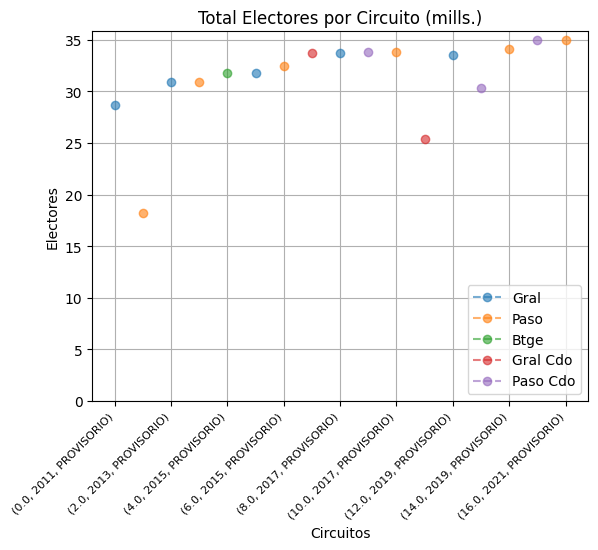

In [44]:
# Plotting total electors by circuit for each election type and year
electores_total = electores_circ.groupby('eleccion_id')[['mesa_electores_sum']].sum()
electores_total = electores_total.reset_index().merge(elecciones).set_index(list(elecciones.columns))

# electores_total = electores_total.unstack(['año', 'eleccion_tipo', 'padron_tipo'])
fig, ax = plt.subplots(1, 1)
# (electores_total.unstack('eleccion_tipo')/1e6).plot(marker='o', linestyle='--', ax=ax, alpha = .6)
plot_data = (electores_total.unstack(['eleccion_tipo', 'padron_tipo'])/1e6)
plot_data.plot(marker='o', linestyle='--', ax=ax, alpha = .6)
ax.set_title("Total Electores por Circuito (mills.)")
ax.set_xlabel("Circuitos")
ax.set_ylabel("Electores")
ax.grid(True)
ax.set_ylim(0, )
plt.xticks(rotation=45, ha = 'right', fontsize = 8)
ax.legend(['Gral', 'Paso', 'Btge', 'Gral Cdo', 'Paso Cdo'], loc='lower right')
plt.show()

In [45]:
electores_total.unstack(['eleccion_tipo', 'padron_tipo'])

mesa_electores_sum                          \
eleccion_tipo                             GENERAL        PASO   BALLOTAGE   
padron_tipo                                NORMAL      NORMAL      NORMAL   
eleccion_id año  recuento_tipo                                              
0.0         2011 PROVISORIO            28700909.0         NaN         NaN   
1.0         2011 PROVISORIO                   NaN  18178850.0         NaN   
2.0         2013 PROVISORIO            30939823.0         NaN         NaN   
3.0         2013 PROVISORIO                   NaN  30884085.0         NaN   
4.0         2015 PROVISORIO                   NaN         NaN  31820939.0   
5.0         2015 PROVISORIO            31754774.0         NaN         NaN   
6.0         2015 PROVISORIO                   NaN  32474342.0         NaN   
7.0         2017 PROVISORIO                   NaN         NaN         NaN   
8.0         2017 PROVISORIO            33761474.0         NaN         NaN   
9.0         2017 PROVISORIO                   NaN         NaN         NaN   
10.0        2017 PROVISORIO                   NaN  33786770.0         NaN   
11.0        2019 PROVISORIO                   NaN         NaN         NaN   
12.0        2019 PROVISORIO            33510619.0         NaN         NaN   
13.0        2019 PROVISORIO                   NaN         NaN         NaN   
14.0        2019 PROVISORIO                   NaN  34084310.0         NaN   
15.0        2021 PROVISORIO                   NaN         NaN         NaN   
16.0        2021 PROVISORIO                   NaN  34977551.0         NaN   

                                                        
eleccion_tipo                      GENERAL        PASO  
padron_tipo                        COMANDO     COMANDO  
eleccion_id año  recuento_tipo                          
0.0         2011 PROVISORIO            NaN         NaN  
1.0         2011 PROVISORIO            NaN         NaN  
2.0         2013 PROVISORIO            NaN         NaN  
3.0         2013 PROVISORIO            NaN         NaN  
4.0         2015 PROVISORIO            NaN         NaN  
5.0         2015 PROVISORIO            NaN         NaN  
6.0         2015 PROVISORIO            NaN         NaN  
7.0         2017 PROVISORIO     33761474.0         NaN  
8.0         2017 PROVISORIO            NaN         NaN  
9.0         2017 PROVISORIO            NaN  33786770.0  
10.0        2017 PROVISORIO            NaN         NaN  
11.0        2019 PROVISORIO     25411936.0         NaN  
12.0        2019 PROVISORIO            NaN         NaN  
13.0        2019 PROVISORIO            NaN  30350488.0  
14.0        2019 PROVISORIO            NaN         NaN  
15.0        2021 PROVISORIO            NaN  34977551.0  
16.0        2021 PROVISORIO            NaN         NaN

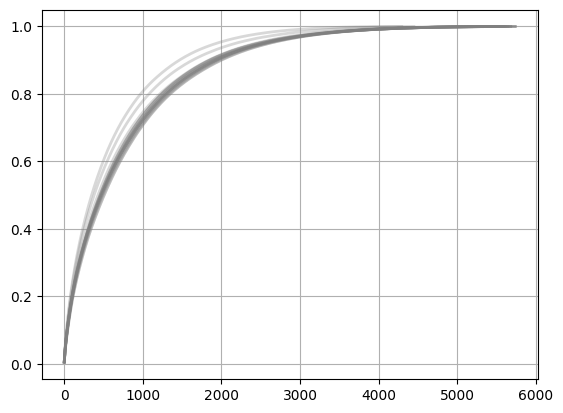

In [46]:

# Plotting cumulative sum of circuits by number of electors per circuit for each election type
df = electores_circ.groupby(['eleccion_id', 'distrito_id', 'seccion_id', 'circuito_id'])['mesa_electores_sum'].sum()
table = df.unstack(['eleccion_id'])
for col in table.columns:
    x = table[col].dropna().sort_values(ascending=False)
    x = x.reset_index(drop = True)
    cs = (x.cumsum()/x.sum())
    cs.plot(grid = True, color = '.5', alpha = .3, label = col, lw = 2)

In [47]:
electores_circuito = electores_circ.groupby(['eleccion_id', 'distrito_id', 'seccion_id', 'circuito_id'])[['mesa_electores_sum']].sum()

electores_circuito = electores_circuito.unstack(['eleccion_id'])
electores_circuito.count()

                    eleccion_id
mesa_electores_sum  0.0            5481
                    1.0            4450
                    2.0            5609
                    3.0            5620
                    4.0            5588
                    5.0            5535
                    6.0            5647
                    7.0            5739
                    8.0            5739
                    9.0            5739
                    10.0           5739
                    11.0           4295
                    12.0           5681
                    13.0           5338
                    14.0           5649
                    15.0           5681
                    16.0           5681
dtype: int64

In [48]:
pd.options.display.max_rows = 120

In [50]:
electores_circuito.loc[2].head(100).fillna('')

mesa_electores_sum                                      \
eleccion_id                          0.0      1.0      2.0      3.0      4.0    
seccion_id circuito_id                                                          
1.0        000001                  8471.0   7760.0   8875.0   8864.0   9008.0   
           000002                   133.0    133.0    101.0    101.0     89.0   
           000003                  3151.0   3146.0   3164.0   3161.0   3122.0   
           000004                    82.0     82.0     64.0     64.0     54.0   
           000005                  1335.0   1334.0   1301.0   1298.0   1194.0   
           000006                   104.0    104.0     93.0     93.0     88.0   
           000007                   632.0    630.0    622.0    624.0    616.0   
2.0        000010                  7072.0   6168.0   7333.0   7331.0   7455.0   
           000011                   421.0    351.0    431.0    430.0    439.0   
           000012                   343.0             340.0    341.0    327.0   
           000013                   168.0    168.0    172.0    172.0    183.0   
           000014                   349.0    698.0    636.0    635.0    647.0   
           000015                   103.0    103.0    100.0    100.0     96.0   
3.0        000017                 26844.0  21095.0  26708.0  26716.0  24840.0   
           000018                 29564.0  23943.0  31335.0  31278.0  29477.0   
           000019                 76006.0  48958.0  83960.0  83797.0  84297.0   
           000020                 33421.0  25716.0  34432.0  34351.0  34540.0   
           000021                 46267.0  27392.0  48504.0  48316.0  51789.0   
           000022                 28302.0  15410.0  33307.0  33250.0  32993.0   
           00018A                 42475.0  20512.0  47691.0  47483.0  49157.0   
           00020A                 22929.0  17999.0  26293.0  26197.0  28342.0   
           00021A                  8652.0   7359.0  10424.0  10375.0  11752.0   
           00022A                 48803.0  27760.0  51192.0  51092.0  51219.0   
           00022B                 11895.0   5604.0  13460.0  13413.0  14172.0   
4.0        000023                 13940.0  12183.0  13959.0  13931.0  13445.0   
           000024                 13338.0   9986.0   9907.0   9888.0   9469.0   
           000025                 10616.0   9551.0  10945.0  10915.0  11111.0   
           000026                  4190.0   1749.0   4655.0   4636.0   4930.0   
           000027                 20267.0  14055.0  24742.0  24764.0  19270.0   
           000030                  6204.0   5293.0   6163.0   6148.0   6189.0   
           000031                  1357.0   1004.0   1332.0   1330.0   1343.0   
           000032                  3987.0   3288.0   4104.0   4098.0   4120.0   
           000033                 11243.0   8791.0  12985.0  12997.0  11998.0   
           000034                 20777.0  17420.0  20842.0  20807.0  20890.0   
           000037                 17328.0  12759.0  19960.0  19953.0  19267.0   
           000038                 35967.0  29990.0  36435.0  36356.0  34246.0   
           000039                 50131.0  36778.0  52702.0  52563.0  50392.0   
           000040                 63820.0  52102.0  67406.0  67308.0  65971.0   
5.0        000046                 15454.0  12254.0  16387.0  16343.0  16577.0   
           000048                                      23.0     23.0     20.0   
           000049                    25.0     25.0     23.0     23.0     23.0   
           000050                    58.0     58.0     55.0     55.0     52.0   
           000051                    32.0     32.0     31.0     31.0     24.0   
           000052                    85.0     85.0     86.0     86.0     82.0   
           000053                                      16.0     16.0     16.0   
           000054                    19.0     19.0     19.0     19.0            
           000055                   118.0    118.0    

In [51]:
# Displaying some statistics for number of circuits present in each province across different elections
## En la mayoria de las provincias, los circuitos van cambiando, estan presentes por lo general en ~10 elecciones, a veces en 12 o 13, a veces solo en una.
grouped = electores_circuito.count(1).groupby(level='distrito_id')
grouped.describe()#.astype(int)

,count,mean,std,min,25%,50%,75%,max
distrito_id,,,,,,,,
1.0,167.0,14.988024,0.154765,13.0,15.0,15.0,15.0,15.0
2.0,1143.0,16.136483,2.715447,2.0,17.0,17.0,17.0,17.0
3.0,158.0,15.898734,1.895989,6.0,16.0,16.0,17.0,17.0
4.0,634.0,15.817035,0.571542,10.0,16.0,16.0,16.0,16.0
5.0,170.0,16.576471,0.790124,10.0,16.0,17.0,17.0,17.0
6.0,159.0,16.610063,0.833719,11.0,17.0,17.0,17.0,17.0
7.0,121.0,16.000000,2.680174,6.0,17.0,17.0,17.0,17.0
8.0,359.0,14.540390,4.173327,3.0,15.0,16.0,17.0,17.0
9.0,163.0,15.932515,1.066486,11.0,16.0,16.0,17.0,17.0


In [52]:
# Displaying unique circuits by election type and year
circuitos = electores_circ.drop(['mesa_electores_sum'], axis=1).drop_duplicates()
circuitos.head(10)

,eleccion_id,distrito_id,seccion_id,circuito_id,mesa_electores_size
1,0.0,1.0,1.0,000001,32.0
2,0.0,1.0,1.0,000002,32.0
3,0.0,1.0,1.0,000003,3.0
4,0.0,1.0,1.0,000004,3.0
5,0.0,1.0,1.0,000005,18.0
6,0.0,1.0,1.0,000006,48.0
7,0.0,1.0,1.0,000007,25.0
8,0.0,1.0,1.0,000008,26.0
9,0.0,1.0,1.0,000009,35.0
10,0.0,1.0,1.0,000010,39.0


In [53]:
# Counting the number of rows with non-null values for each of the selected columns
electores_circ.count() # 92782, 93389

eleccion_id            93211
distrito_id            93211
seccion_id             93211
circuito_id            93211
mesa_electores_sum     93211
mesa_electores_size    93211
dtype: int64

In [54]:
## los circuitos, parecen ir cambiando de eleccion a eleccion... aca podemos tener problemas y cuestiones que revisar
electores_circuito.count(1).describe()

count    6171.000000
mean       15.104683
std         3.571233
min         1.000000
25%        15.000000
50%        16.000000
75%        17.000000
max        17.000000
dtype: float64

In [56]:
# electores_circ.sort_values('mesa_electores_sum', ascending = False).reset_index(drop = True).iloc[::1000]

In [32]:
# # Debug longitud de ID circuito

# # Agrega una nueva columna al dataframe con la longitud de cada string en la columna "circuito_id"
# circuitos['circuito_id_str_len'] = circuitos['circuito_id'].str.len()

# # Agrupa los datos en el dataframe basados en los valores de las columnas "Año", "eleccion_tipo", "recuento_tipo" y "distrito_id", y selecciona la columna "circuito_id_str_len"
# grouped = circuitos.groupby([u'Año', 'eleccion_tipo', 'recuento_tipo', 'distrito_id'])['circuito_id_str_len']

# # Calcula la media de los valores agrupados y desagrupa los resultados basados en las columnas "Año" y "eleccion_tipo"
# grouped.agg(['mean']).unstack(['Año', 'eleccion_tipo']) # mean
# print(grouped.agg(['mean']).unstack(['Año', 'eleccion_tipo']).head()) # mean
# # # grouped.agg(['min', 'mean', 'max']).unstack(['Año', 'eleccion_tipo']) # min max

# #                              mean                                           \
# # Año                          2011         2013           2015                
# # eleccion_tipo             GENERAL PASO GENERAL PASO BALLOTAGE GENERAL PASO   
# # recuento_tipo distrito_id                                                    
# # PROVISORIO    1               6.0  6.0     6.0  6.0       6.0     6.0  6.0   
# #               2               6.0  6.0     6.0  6.0       6.0     6.0  6.0   


# ### Buena parte se arregla rellenando con ceros a la izquierda
# circuitos['circuito_id_'] = circuitos['circuito_id'].str.zfill(6)

# circuitos[['circuito_id', 'circuito_id_']].nunique()

In [33]:
# Debug. Duplicate lines in data from 2021.

# electores_circ.set_index(['Año', 'eleccion_tipo', 'recuento_tipo', 'padron_tipo', 'distrito_id', 'circuito_id']
# ).unstack(['Año'])#.unstack(['Año', 'eleccion_tipo', 'recuento_tipo', 'padron_tipo'])

# duplicates = n_electores.drop_duplicates().groupby(['Año', 'eleccion_tipo', 'recuento_tipo', 'padron_tipo', 'distrito_id', 'circuito_id']).size()
# duplicates.loc[duplicates > 1].reset_index().merge(n_electores, how = 'left')


# # Establece el índice del dataframe "n_electores" basado en las columnas "Año", "eleccion_tipo", "recuento_tipo", "padron_tipo", "distrito_id", y "circuito_id"
# # Desagrupa los datos basados en la columna "Año"
# n_electores.set_index(['Año', 'eleccion_tipo', 'recuento_tipo', 'padron_tipo', 'distrito_id', 'circuito_id']
# ).unstack(['Año'])#.unstack(['Año', 'eleccion_tipo', 'recuento_tipo', 'padron_tipo'])

# # Elimina las filas duplicadas en el dataframe "n_electores" y agrupa los datos basados en las columnas "Año", "eleccion_tipo", "recuento_tipo", "padron_tipo", "distrito_id" y "circuito_id". Luego, cuenta el tamaño de cada grupo.
# # Filtra los grupos con más de una fila y resetea el índice. Finalmente, une los resultados con el dataframe original "n_electores" usando una unión tipo "left"
# duplicates = n_electores.drop_duplicates().groupby(['Año', 'eleccion_tipo', 'recuento_tipo', 'padron_tipo', 'distrito_id', 'circuito_id']).size()
# duplicates.loc[duplicates > 1].reset_index().merge(n_electores, how = 'left')
